**Name: Arpit Agarwal** 

**Date: 04/28/2025**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit as fit 
import scipy.stats as st
import matplotlib.cm as cm

# Part 1

In [2]:
#Part(a) 
data = np.loadtxt("atlas_z_to_ll.csv",skiprows=1,delimiter=',')

In [3]:
#Part(b)
pt1 = data[:,0]
pt2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

px1 = pt1*np.cos(phi1)
py1 = pt1*np.sin(phi1) 
pz1 = pt1*np.sinh(eta1)
px2 = pt2*np.cos(phi2)
py2 = pt2*np.sin(phi2) 
pz2 = pt2*np.sinh(eta2) 

px = px1+px2 
py = py1+py2 
pz = pz1+pz2 
E = E1+E2 

M = np.sqrt(E**2 - (px**2+py**2+pz**2)) 

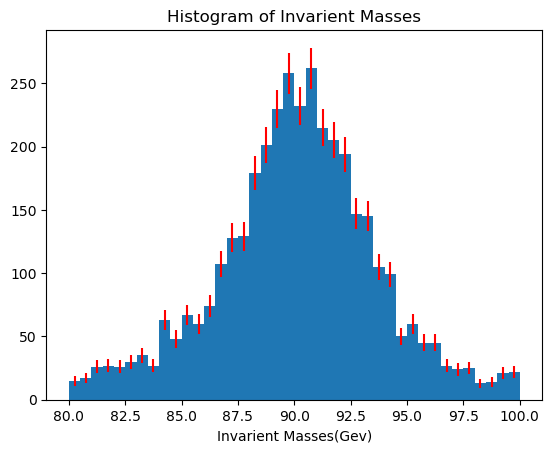

In [4]:
#Part(c)
bins = np.linspace(80,100,41) 
fig,ax = plt.subplots() 
counts,bins,p = ax.hist(M,bins=bins)
m = (bins[:-1]+bins[1:])/2 
stdev = np.sqrt(counts)
ax.errorbar(m,counts,yerr=stdev,ls='',color='red');
ax.set_xlabel("Invarient Masses(Gev)");
ax.set_title("Histogram of Invarient Masses");


# Part 2

In [5]:
#Part(a) 
def D(m,m0,ugamma):
    num = ugamma/2
    dem = (m-m0)**2 + (ugamma/2)**2
    return num/(dem*np.pi) 

In [6]:
#Part(b) 
mask = (m > 87) & (m < 93) 
def fitfun(m,m0,ugamma):
    return (5000/2) * D(m, m0, ugamma)

params, pcov = fit(fitfun,m[mask],counts[mask],sigma=stdev[mask]) 
countfit = fitfun(m,*params)

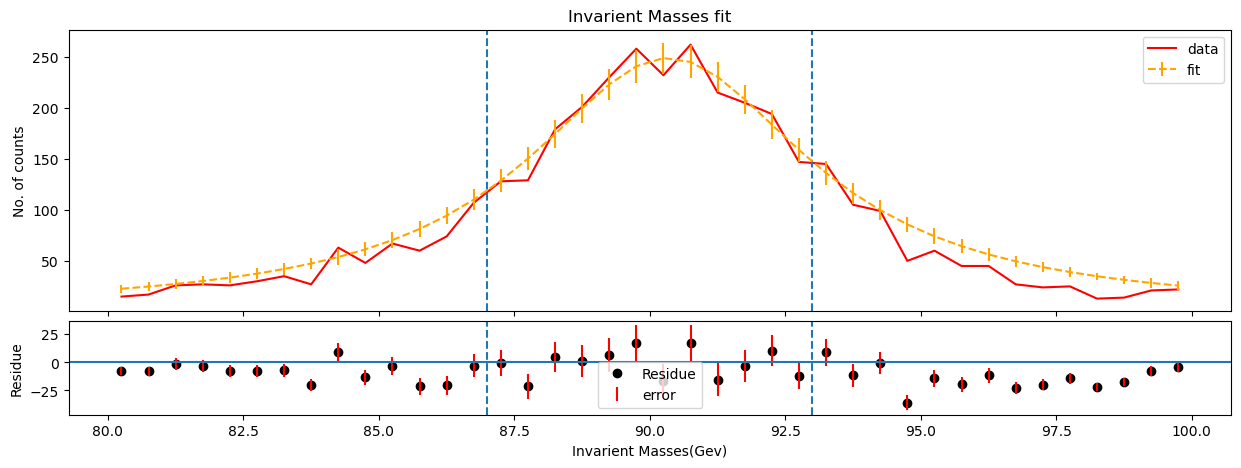

In [7]:
#Part(c)
fig,(ax_top,ax_bot) = plt.subplots(
    2,1,sharex=True,figsize=(15,5),gridspec_kw={'height_ratios':[3,1],'hspace':0.05} 
) 

ax_top.plot(m,counts,color='red',label='data') 
ax_top.errorbar(m,countfit,yerr=stdev,color='orange',ls='--',label='fit');
ax_top.set_xlabel("Invarient Masses(Gev)");
ax_top.set_ylabel("No. of counts"); 
ax_top.set_title("Invarient Masses fit");
ax_top.legend();
ax_top.axvline(87,ls='--')
ax_top.axvline(93,ls='--')

res = (counts-countfit)
ax_bot.plot(m,res,'ok',label="Residue");
ax_bot.errorbar(m,res,stdev,ls='None',color='r',label='error');
ax_bot.axhline(0);
ax_bot.legend();
ax_bot.set_xlabel("Invarient Masses(Gev)");
ax_bot.set_ylabel("Residue"); 
ax_bot.axvline(87,ls='--');
ax_bot.axvline(93,ls='--');

In [8]:
#Part(d) 
chisq = np.sum((counts[mask]-countfit[mask])**2/stdev[mask]**2) 
ndof = len(counts[mask])-len(params) 
reducedchisq = chisq/ndof
pvalue = st.chi2.sf(chisq,ndof) 

print(f"The Chi-Sqared value of the fit with the data came out to be: {chisq:.4f}")
print(f"The no. of degrees of freedom are: {ndof}, since there was only {len(params)} fitting parameters, thus it was the no. of data points-{len(params)}")  
print(f"From this our reduced chisq becomes : {reducedchisq:.4f} which is very close to 1 thus it seems like a good fit") 
print(f"The P-Value of the fit with the data camme out to be {pvalue:.4f}")  
print(f"Since the P-value:{pvalue:.4f} is greater than 0.05 and less than 0.95, then it can be said that it is an acceptable fit for the data")

The Chi-Sqared value of the fit with the data came out to be: 9.9851
The no. of degrees of freedom are: 10, since there was only 2 fitting parameters, thus it was the no. of data points-2
From this our reduced chisq becomes : 0.9985 which is very close to 1 thus it seems like a good fit
The P-Value of the fit with the data camme out to be 0.4418
Since the P-value:0.4418 is greater than 0.05 and less than 0.95, then it can be said that it is an acceptable fit for the data


In [9]:
#Part(e)
err_m0 = np.sqrt(np.diag(pcov))[0]
err_ugamma = np.sqrt(np.diag(pcov))[1] 
print(f"The best fit value of m0 came out to be {params[0]:.5f} +- {err_m0:.5f} GeV")
print(f"The best fit value of width came out to be {params[1]:.5f} +- {err_ugamma:.5f} GeV")

The best fit value of m0 came out to be 90.34081 +- 0.09345 GeV
The best fit value of width came out to be 6.39100 +- 0.18094 GeV


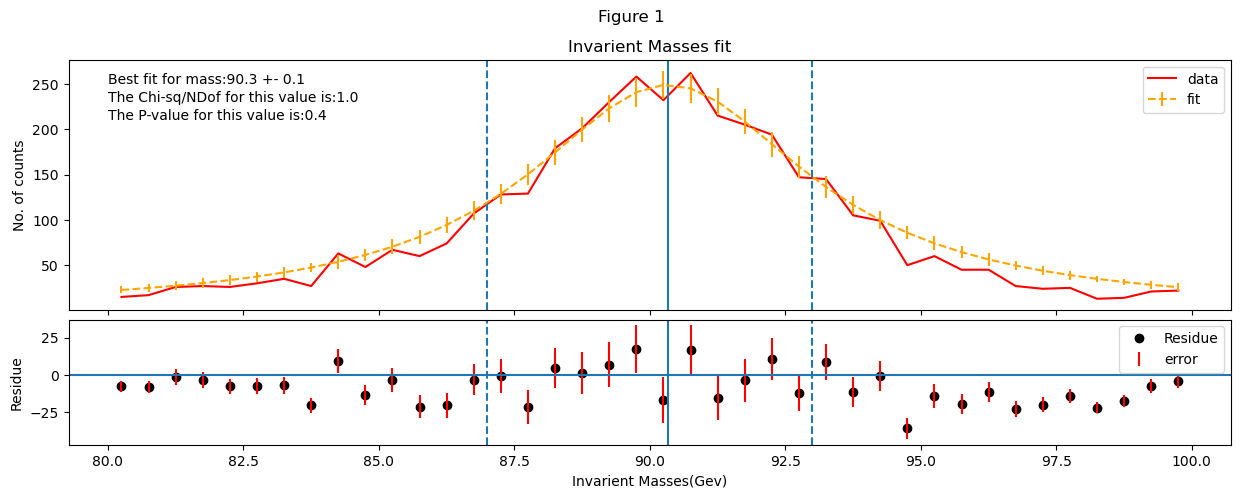

In [10]:
#Part(f) 
fig,(ax_top,ax_bot) = plt.subplots(
    2,1,sharex=True,figsize=(15,5),gridspec_kw={'height_ratios':[3,1.5],'hspace':0.05} 
) 

ax_top.plot(m,counts,color='red',label='data') 
ax_top.errorbar(m,countfit,yerr=stdev,color='orange',ls='--',label='fit');
ax_top.set_xlabel("Invarient Masses(Gev)");
ax_top.set_ylabel("No. of counts"); 
ax_top.set_title("Invarient Masses fit");
ax_top.legend();
ax_top.axvline(87,ls='--')
ax_top.axvline(93,ls='--')
ax_top.axvline(params[0]);

res = (counts-countfit)
ax_bot.plot(m,res,'ok',label="Residue");
ax_bot.errorbar(m,res,stdev,ls='None',color='r',label='error');
ax_bot.axhline(0);
ax_bot.legend();
ax_bot.set_xlabel("Invarient Masses(Gev)");
ax_bot.set_ylabel("Residue"); 
ax_bot.axvline(87,ls='--');
ax_bot.axvline(93,ls='--');
ax_bot.axvline(params[0]);


ax_top.text(80,250,f"Best fit for mass:{params[0]:.1f} +- {err_m0:.1f}");
ax_top.text(80,230,f"The Chi-sq/NDof for this value is:{reducedchisq:.1f}");
ax_top.text(80,210,f"The P-value for this value is:{pvalue:.1f}");

fig.suptitle("Figure 1");

# Part 3

In [11]:
#Part(a)
m_bins = np.linspace(89,91,300) 
ugamma_bins = np.linspace(5,8,300) 
chisq = np.zeros((300,300))
for i in range(len(m_bins)):
    for j in range(len(ugamma_bins)):
        chisq[i,j] = np.sum((counts[mask]-fitfun(m[mask],m_bins[i],ugamma_bins[j]))**2/stdev[mask]**2) 

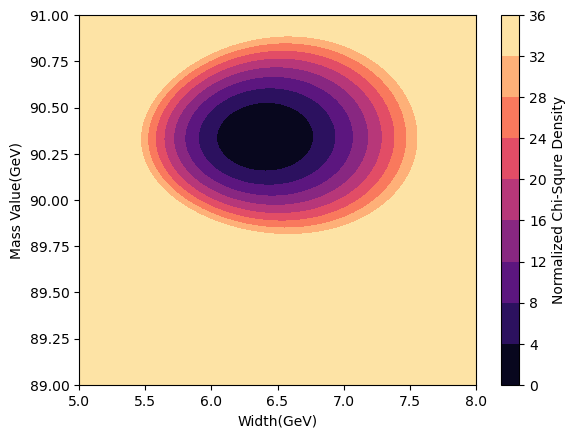

In [12]:
#Part(b) 
chimin = np.ones((300,300))*np.min(chisq)
delchi = chisq-chimin 
delchi_clip = np.clip(delchi,0,35)
X,Y = np.meshgrid(ugamma_bins,m_bins)

fig,ax = plt.subplots() 
c = ax.contourf(X,Y,delchi_clip,levels=10,cmap=cm.magma);
cbar  = fig.colorbar(c)
cbar.set_label("Normalized Chi-Squre Density");
ax.set_ylabel("Mass Value(GeV)");
ax.set_xlabel("Width(GeV)");


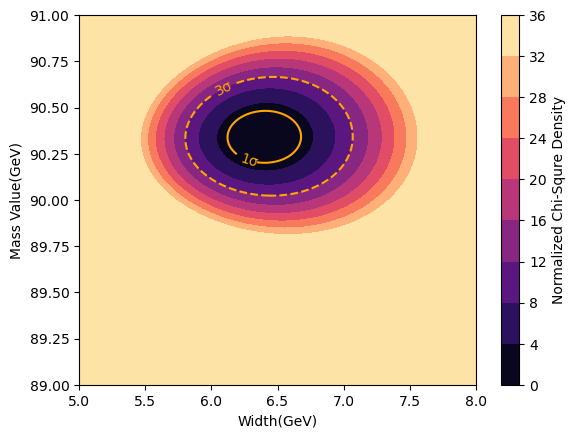

In [13]:
#Part(c) 
fig,ax = plt.subplots() 
c = ax.contourf(X,Y,delchi_clip,levels=10,cmap=cm.magma);
CS = ax.contour(X, Y, delchi_clip, levels=[2.30, 11.83], colors='orange', linestyles=['solid', 'dashed'])
cbar  = fig.colorbar(c)
cbar.set_label("Normalized Chi-Squre Density");
ax.set_ylabel("Mass Value(GeV)");
ax.set_xlabel("Width(GeV)");
ax.clabel(CS, fmt={2.3: '1σ', 11.83: '3σ'});

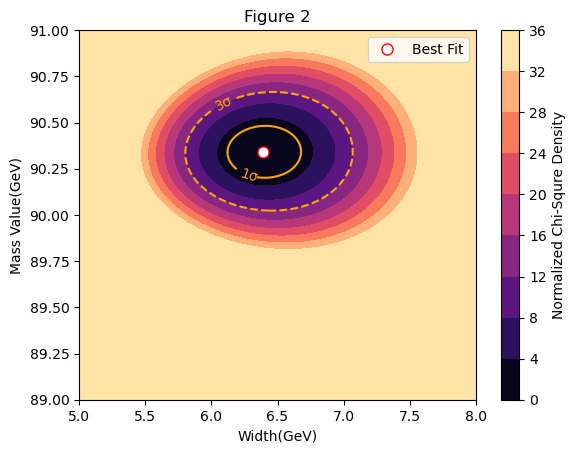

In [14]:
#Part(d) 
fig,ax = plt.subplots() 
c = ax.contourf(X,Y,delchi_clip,levels=10,cmap=cm.magma);
CS = ax.contour(X, Y, delchi_clip, levels=[2.30, 11.83], colors='orange', linestyles=['solid', 'dashed'])
cbar  = fig.colorbar(c)
cbar.set_label("Normalized Chi-Squre Density");
ax.set_ylabel("Mass Value(GeV)");
ax.set_xlabel("Width(GeV)");
ax.clabel(CS, fmt={2.3: '1σ', 11.83: '3σ'});
ax.plot(params[1],params[0],'wo', markersize=8, markeredgecolor='red', label='Best Fit');
ax.legend();
ax.set_title("Figure 2");